In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
lobster = pd.read_csv("/Users/jiunlee/Documents/Fall_23/MarketingAnalytics/Assignment1/lobster_23.csv")

# Exploratory Data Analysis

## A

In [3]:
#A
lobster.head()

,Date,weekday,high_temp,precip_total,unique_visitors,gold_zone_rev,park_merch_rev,online_merch_rev,lobsterama_rev,lost_found_items,first_aid_incidents,operational_status,staff_hours,total_rev,sign_ups24,merch_promo
0,2023-05-29,Mon,71,0.00,5448,9623,6028,39,9665,9,1,95.4,2042.83,193414.58,61.0,0
1,2023-05-30,Tue,66,0.00,3977,6462,2461,550,7368,2,6,93.3,1223.69,111946.06,76.0,0
2,2023-05-31,Wed,71,0.00,4634,5495,2825,1188,6991,3,3,86.6,1425.85,130465.64,92.0,0
3,2023-06-01,Thu,84,T,3012,10683,2379,1184,7803,4,4,90.8,976.80,105386.53,67.0,1
4,2023-06-02,Fri,85,0.09,5741,8932,4242,187,10173,7,3,86.2,1461.38,172071.35,93.0,0


## B. When using head(), 5 rows are visible.

## C

In [4]:
#C
lobster.shape

(99, 16)

**C. There are 99 rows and 16 columns in the dataset.**

## D

In [22]:
lobster.dtypes

Date                    object
weekday                 object
high_temp                int64
precip_total           float64
unique_visitors          int64
gold_zone_rev            int64
park_merch_rev           int64
online_merch_rev         int64
lobsterama_rev           int64
lost_found_items         int64
first_aid_incidents      int64
operational_status     float64
staff_hours            float64
total_rev              float64
sign_ups24             float64
merch_promo              int64
weekend                  int64
very_rainy               int64
A                        int64
B                        int64
dtype: object

**D(a). 
Except for the categorical variables including 'Date' and 'merch_promo', other variables are all numeric.**

## E

**E(a).'T' on a weather report means trace precipitation, which means it 's too tiny to measure accurately.**

In [23]:
lobster['precip_total']

0     0.00000
1     0.00000
2     0.00000
3     0.00001
4     0.09000
       ...   
94    0.00000
95    0.00000
96    0.00000
97    0.00000
98    0.00000
Name: precip_total, Length: 99, dtype: float64

In [24]:
# E(b). Replacing 'T' with a suitable numeric alternative
lobster['precip_total'] = lobster['precip_total'].replace('T', '0.00001')
lobster['precip_total'] = lobster['precip_total'].astype(float)


## F

In [25]:
lobster['weekday'].unique() #Fri, Sat, Sunday will be considered as weekend

array(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], dtype=object)

In [26]:
#F(a). Create a new variable that indicates it's weekend or not.
weekdays = lobster['weekday']
weekend=[]
for weekday in weekdays:
    if (weekday=='Fri')|(weekday=='Sat')|(weekday=='Sun'): #Weekend=1(Fri,Sat,Sun)
        value = 1
        weekend.append(value)
    else:
        value=0 #weekend=0 (weekdays)
        weekend.append(value)

#making new column
lobster['weekend'] = weekend

#confirming
lobster[['weekday','weekend']] #look great.

,weekday,weekend
0,Mon,0
1,Tue,0
2,Wed,0
3,Thu,0
4,Fri,1
...,...,...
94,Thu,0
95,Fri,1
96,Sat,1
97,Sun,1


In [27]:
lobster['precip_total'].unique()

array([0.00e+00, 1.00e-05, 9.00e-02, 4.60e-01, 3.70e-01, 2.90e-01,
       1.00e-02, 1.30e-01, 1.28e+00, 8.00e-02, 1.84e+00, 6.00e-02,
       3.00e-02, 7.00e-02, 5.80e-01, 1.80e+00, 4.70e-01, 2.70e-01,
       9.30e-01, 2.10e-01, 2.00e-02, 4.00e-01, 8.60e-01, 1.80e-01,
       4.00e-02, 5.20e-01, 1.50e-01, 1.03e+00, 8.10e-01, 1.60e-01,
       1.11e+00, 5.00e-02, 9.40e-01, 8.30e-01])

In [30]:
#F(b). Create new column 'very_rainy' that total precipitation is over 1.0
very_rainy = []
for rainyday in lobster['precip_total']:
    if rainyday >= 1.0:
        value = 1 #very rainy
        very_rainy.append(value)
    else:
        value =0 #not very rainy
        very_rainy.append(value)
        
lobster['very_rainy'] = very_rainy #make new column

lobster.loc[lobster['very_rainy'] == 1][['precip_total','very_rainy']] #confirming

,precip_total,very_rainy
15,1.28,1
19,1.84,1
34,1.80,1
71,1.03,1
81,1.11,1


In [20]:
lobster[['lost_found_items','first_aid_incidents']].head() #original values of two columns

,lost_found_items,first_aid_incidents
0,1,9
1,6,2
2,3,3
3,4,4
4,3,7


In [31]:
#F(c). Switch the values of two columns 'lost_found_items' and 'first_aid_incidents'
lobster['A']=lobster['lost_found_items']
lobster['B']=lobster['first_aid_incidents']

lobster['first_aid_incidents']=lobster['A']
lobster['lost_found_items']=lobster['B']

lobster[['lost_found_items','first_aid_incidents']] #confirming if two columns are switched. They are switched.

,lost_found_items,first_aid_incidents
0,1,9
1,6,2
2,3,3
3,4,4
4,3,7
...,...,...
94,8,2
95,5,3
96,4,5
97,5,5


## G

In [94]:
#G(a). What was the total amount of revenue generated by Lobster Land across the entire 2023 park season?
total_revenue = lobster.total_rev.sum().round(2)

print("G(a)")
print(f"The total amount of revenue generated by Lobster Land in 2023 is {total_revenue}")

G(a)
The total amount of revenue generated by Lobster Land in 2023 is 13347279.58


In [98]:
#G(b)  
print("G(b)")
#How different was the average Lobsterama Spending on very rainy days vs. days that were not very rainy? 
restrant =lobster.groupby(very_rainy).lobsterama_rev.mean()
print(f"The average lobsterama spending on very rainy days is {restrant[1]}, and not very rainy day is {restrant[0]}")

# How different was the park merchandise spending on very rainy days, vs. not very rainy days? 
merch = lobster.groupby('very_rainy')['park_merch_rev'].mean()
print(f"The average park merchandise spending on very rainy days is {merch[1]}, and not very rainy day is {merch[0]}")

G(b)
The average lobsterama spending on very rainy days is 6262.2, and not very rainy day is 8045.287234042553
The average park merchandise spending on very rainy days is 2585.4, and not very rainy day is 3578.531914893617


In [102]:
#In relative terms, which of these metrics showed a bigger difference? 
print((restrant[0] - restrant[1])/restrant[1])
print((merch[0] - merch[1])/merch[1])

0.28473814858077884
0.3841308559192453


G(b). In relative terms, which of these metrics showed a bigger difference? 
- In relative terms, the park merchandise spending shows a more significant difference than the Lobsterama spending when it's a rainy day. When it's not rainy, the park merchandise revenue is 38% bigger than rainy days, compared to Lobsterama's 28% increase. This probably means the restaurant business is not easily influenced by the weather, but the merchandise business is.

In [100]:
#G(c). 
np.corrcoef(lobster['high_temp'],lobster['lost_found_items'])[0,1]

0.08304029626399437

G(c). Is there correlation between high temperature and the number of new lost&found items?
- The correlation between temperature and the number of lost items is about 0.08. It doesn't seem like people forget things more easily on hot days.

## H

In [105]:
# H(a). Find the standard deviation of Gold Zone revenue, the standard deviation of total daily park revenue. 
gold_std=np.std(lobster.gold_zone_rev)
totalrev_std=np.std(lobster.total_rev)

print("H(a)")
print("The standard deviation of Gold Zone revenue is", gold_std)
print("The standard deviation of total daily park revenue is", totalrev_std)

H(a)
The standard deviation of Gold Zone revenue is 1968.5139260449635
The standard deviation of total daily park revenue is 30792.624316665166


H(b). Why is it misleading to directly compare these two numbers when
comparing these variables’ relative levels of dispersion?

- The two variables have different scales and their standard deviations are also in different scales. Because one is for the whole theme park but the other is for part of the theme park. When comparing two variables, using the coefficient of variation is correct.


In [108]:
# F(c) Now, find the coefficient of variation (CV) for the gold zone and for the total daily park revenue.
a = (gold_std / lobster.gold_zone_rev.mean()) *100
b = (totalrev_std / lobster.total_rev.mean()) *100

print("F(c).i")
print(f"CV for the gold zone is {a} and for the total daily park revenue is {b}.")

F(c).i
CV for the gold zone is 24.75294148678686 and for the total daily park revenue is 22.839634017390164.


F(c).ii
- CV is used for comparing relative variations between different data sets having different units or scales, like gold zone revenue and total daily revenue. 

## I

In [ ]:
Are there any missing values in this dataset? If so, how many total values are
missing, and from which column(s) are they missing? Use Python code to answer
this question.
a. It might be tempting at first to think that we should impute (replace)
these values with another number. However, we do not necessarily need
to do this. Why might it be okay to simply leave these NaNs alone?


In [112]:
lobster.isnull().sum()

Date                   0
weekday                0
high_temp              0
precip_total           0
unique_visitors        0
gold_zone_rev          0
park_merch_rev         0
online_merch_rev       0
lobsterama_rev         0
lost_found_items       0
first_aid_incidents    0
operational_status     5
staff_hours            3
total_rev              0
sign_ups24             0
merch_promo            0
weekend                0
very_rainy             0
A                      0
B                      0
dtype: int64

I. 
- There are 8 missing values in total in the dataset, from 'operational_status' and 'staff_hours' columns.

I(a). Why might it be okay to simply leave these NaNs alone?
- Imputing the NaNs might skew the data and lead to biased data. Therefore, leaving NaNs as it is might be better in some situations when the missing values represent certain trends. 


## J

In [113]:
#J(a)
lobster = lobster.rename(columns = {"precip_total": "Precip_Total"})

# Data Visualization

## K

Text(0.5, 1.0, 'Lobsterama revenue')

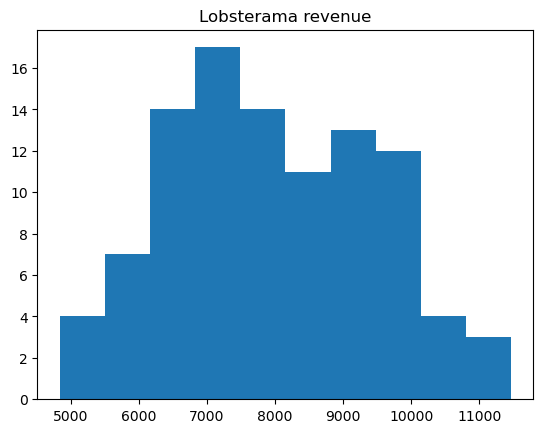

In [116]:
# K. generate a histogram of lobsterama revenue
plt.hist(lobster['lobsterama_rev'])
plt.title('Lobsterama revenue')

K(a). It's not normal distributed and right skewed. There was over 16 days that had daily revenue around 7000.

Text(0.5, 0.98, 'Lobsterama revenue')

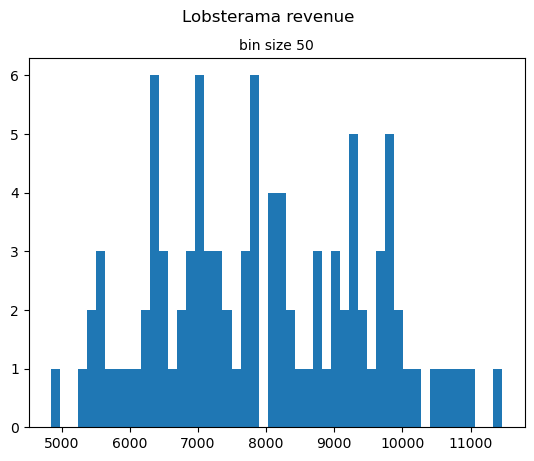

In [128]:
#K(b)
plt.hist(lobster['lobsterama_rev'], bins=50) # change the binsize
plt.title('bin size 50', size = 10)
plt.suptitle('Lobsterama revenue')


K(b)
- The more significant number of bins provides more detailed information on data distribution. This allows us to examine how much money a restaurant makes.


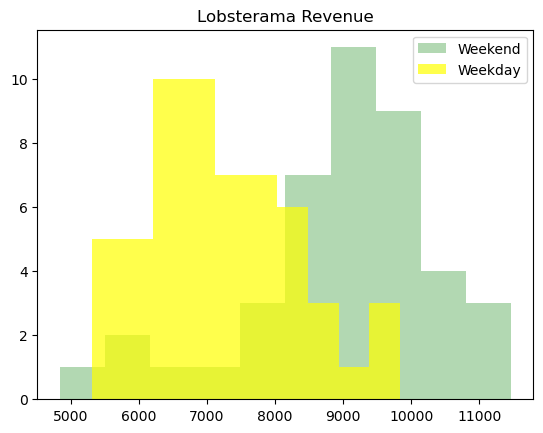

In [136]:
plt.hist(lobster.loc[lobster['weekend'] == 1, 'lobsterama_rev'], alpha=0.3, color='green', label='Weekend')
plt.hist(lobster.loc[lobster['weekend'] == 0, 'lobsterama_rev'], alpha=0.7, color='yellow', label='Weekday')
plt.title('Lobsterama Revenue')
plt.legend()

K(c)
- The distribution of Lobsterama revenue between weekends and weekdays looks reasonable.  More people would visit Lobsterama on weekends, leading to higher revenue than on weekdays. Therefore,  the revenue distribution is left-skewed on weekdays and right-skewed on weekends.

## L

Text(0.5, 1.0, 'Number of unique visitors everyday')

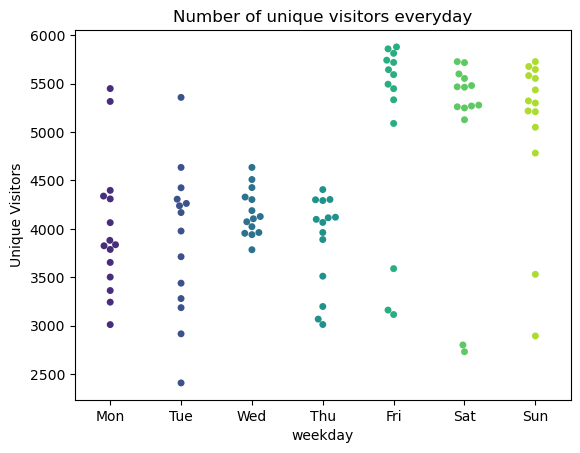

In [140]:
sns.swarmplot(x=lobster['weekday'], y=lobster['unique_visitors'],palette='viridis') 
#Generate a beeswarm plot that depicts ‘weekday’ on one axis,and unique visitors on the other.
plt.ylabel('Unique Visitors')
plt.title('Number of unique visitors everyday')

L(a)
- Weekends tend to have more unique visitors.

In [145]:
# check the two unusually high points for monday and tuesday
lobster_mon = lobster[lobster['weekday'] == 'Mon']
lobster_mon.sort_values(by='unique_visitors', ascending=False).head(2)

,Date,weekday,high_temp,Precip_Total,unique_visitors,gold_zone_rev,park_merch_rev,online_merch_rev,lobsterama_rev,lost_found_items,first_aid_incidents,operational_status,staff_hours,total_rev,sign_ups24,merch_promo,weekend,very_rainy,A,B
0,2023-05-29,Mon,71,0.0,5448,9623,6028,39,9665,1,9,95.4,2042.83,193414.58,61.0,0,0,0,9,1
98,2023-09-04,Mon,81,0.0,5315,8623,5490,640,9718,2,2,90.0,1924.81,182146.72,180.6,0,0,0,2,2


In [147]:
lobster_tue = lobster[lobster['weekday'] == 'Tue']
lobster_tue.sort_values(by='unique_visitors', ascending=False).head(1)

,Date,weekday,high_temp,Precip_Total,unique_visitors,gold_zone_rev,park_merch_rev,online_merch_rev,lobsterama_rev,lost_found_items,first_aid_incidents,operational_status,staff_hours,total_rev,sign_ups24,merch_promo,weekend,very_rainy,A,B
36,2023-07-04,Tue,76,0.27,5357,9057,5176,1059,9839,0,5,96.7,2052.36,194360.43,83.0,0,0,0,5,0


L(c)
- The unusual 3 days having a big number of unique visitors were holidays: May 29 (Memorial Day), September 4 (Labor Day), July 4 (Independence Day). They had uncommon high number of unique visitors even though it was weekdays. 

## M

Text(0.5, 1.0, 'Visitors vs First Aid')

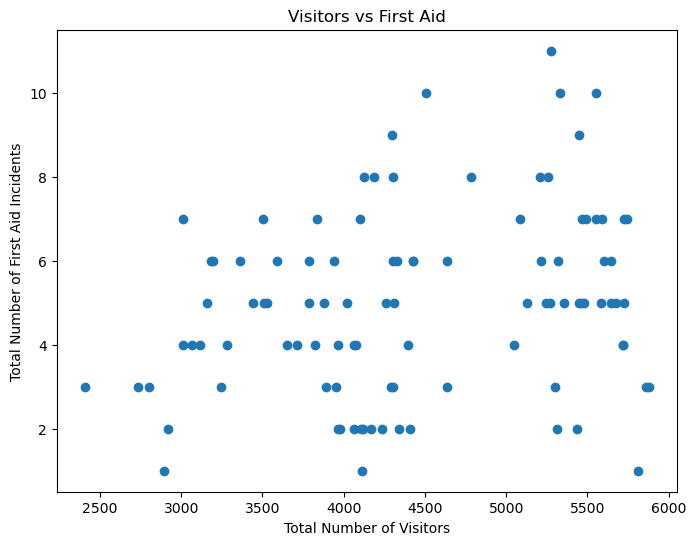

In [149]:
plt.figure(figsize=(8, 6))
plt.scatter(lobster.unique_visitors, lobster.first_aid_incidents)
plt.xlabel("Total Number of Visitors")
plt.ylabel("Total Number of First Aid Incidents")
plt.title("Visitors vs First Aid")

M(a)
- The graph doesn't show strong correlation between the number of visitors and total nu ber of first aid incidents. It would be hard to predict the number of first aid incidents using total number of visitors.

## N

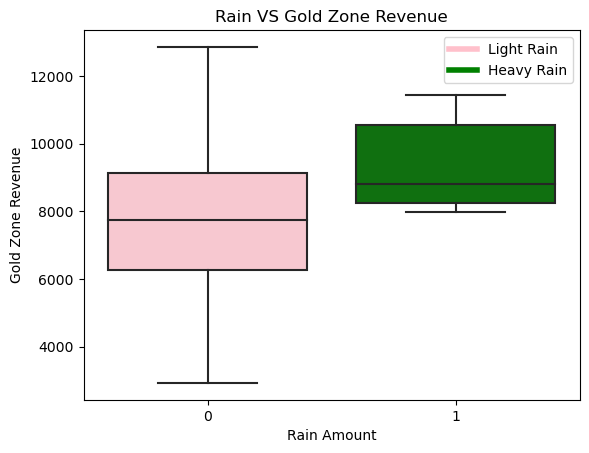

In [171]:
boxplot = sns.boxplot(data=lobster, x='very_rainy', y='gold_zone_rev',palette=['pink', 'green'])
plt.ylabel('Gold Zone Revenue')
plt.xlabel('Rain Amount')
plt.title('Rain VS Gold Zone Revenue')
custom = [plt.Line2D([0], [0], color='pink', lw=4),plt.Line2D([0], [0], color='green', lw=4)]
legend_labels = ['Light Rain', 'Heavy Rain']
# Add legend
boxplot.legend(custom, legend_labels)

N(a)
- The Gold zone's average revenue for heavy rainy days is higher than for light rainy days. This is very odd. This is probably because The number of observations for heavy rainy days is only 5, which is small, so the sample size is not enough to represent the heavy rainy days. Therefore, the boxplot above is biased and not trustworthy.

## O

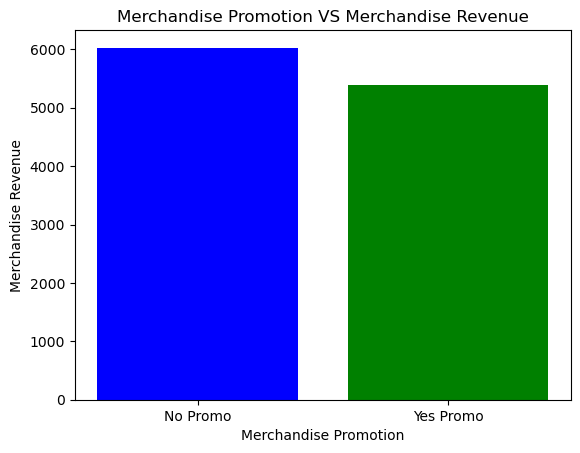

In [191]:
#compare average park merchandise sales on days with the promotion vs. days without the promotion
fill = ['blue' if promotion == 0 else 'green' for promotion in lobster['merch_promo']]
plt.bar(lobster['merch_promo'], lobster["park_merch_rev"], color=fill)
plt.xlabel('Merchandise Promotion')
plt.ylabel('Merchandise Revenue')
plt.title('Merchandise Promotion VS Merchandise Revenue')

plt.xticks([0, 1], ["No Promo", "Yes Promo"])
plt.show()

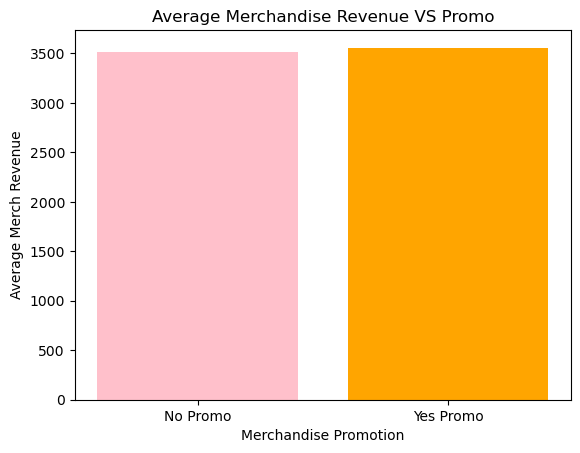

In [197]:
average_parkmerch = lobster.groupby('merch_promo')['park_merch_rev'].mean()
plt.bar(average_parkmerch.index, average_parkmerch.values, color=['pink', 'orange'])
plt.xlabel('Merchandise Promotion')
plt.ylabel('Average Merch Revenue')
plt.title('Average Merchandise Revenue VS Promo')
# set x-axis tick marks
plt.xticks([0, 1], ["No Promo", "Yes Promo"])
plt.show()

In [208]:
len(lobster[lobster['merch_promo']==1])

25

O.
- The second barplot shows that the difference in average merch revenue between days with and without a promo is not so much. But the first barplot shows that days without promotion have more cumulative revenue. Like the previous graph, the sample size could be the problem since the sample size for days with promo is only 25. So, days without promotion might have more cumulative sales because they have more observations. The graphs above are not trustworthy.

## P

Text(0.5, 1.0, 'Sign-ups for 2024 in 2023')

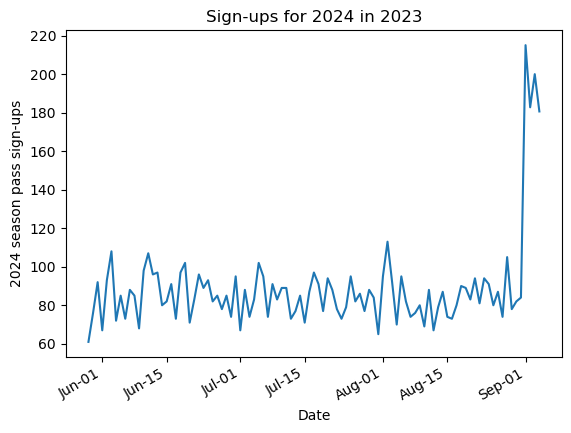

In [213]:
# Generate a lineplot, placing ‘Date’ on the x-axis, and 2024 season pass sign-ups on the y-axis
sns.lineplot(x=pd.to_datetime(lobster['Date'], format='%Y-%m-%d'), y=lobster['sign_ups24'])
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b-%d'))
plt.gcf().autofmt_xdate()
plt.ylabel('2024 season pass sign-ups')
plt.title('Sign-ups for 2024 in 2023')

P(a)
- We can see that there's a clear rapid increase at the end of the year. This might be because people were hesitant to sign up until the very last minute to purchase and eventually decided to buy it.

# Wildcard: Metrics and “Quantified Self”

a) Screen Time on Youtube

b) 
- Thursday, Sep 21 : 1hr 24m
- Friday, Sep 22: 2hr 59m
- Saturday, Sep 23: 5hr 39m

c)
It is interesting that I spent way more time watching YouTube on weekends(Thursday) than on weekdays(Friday and Saturday). The screen time on Friday looks plausible, but Saturday's screen time is way off the average duration. This data is inadequate to see my general time spent on YouTube because I was sick on Saturday, so I used my phone more than usual lying on the bed. Tracking the time didn't change my behavior this week, but I believe in the long term, it would change me. I am willing to experiment with checking the time spent on my phone because it surely wastes time that could be used for other valuable leisure. I also believe less phone usage will clarify my brain, leading to a productive work routine.
